In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 



In [49]:
from tensorflow.keras.datasets import mnist

In [50]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline

In [52]:
x_train.shape

(60000, 28, 28)

In [53]:
single_image = x_train[0]

In [54]:
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [55]:
single_image.shape

(28, 28)

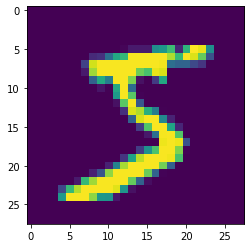

In [56]:
plt.imshow(single_image)

## Preprocessing Data

In [57]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [58]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [59]:
from tensorflow.keras.utils import to_categorical

In [60]:
y_train.shape

(60000,)

In [61]:
y_example = to_categorical(y_train)

In [62]:
y_example

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [63]:
y_example.shape

(60000, 10)

In [64]:
y_example[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [65]:
y_cat_test = to_categorical(y_test,10)

In [66]:
y_cat_train = to_categorical(y_train,10)

## Processing Data

## Normalizing the X dataset

In [67]:
single_image.max()

255

In [68]:
single_image.min()

0

In [69]:
x_train = x_train/255
x_test = x_test/255

In [70]:
scaled_single = x_train[0]

In [71]:
scaled_single.max()

1.0

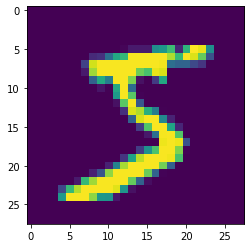

In [72]:
plt.imshow(scaled_single)

## Reshaping Data 

Adding 1 dimension RGB channel. 

In [73]:
x_train.shape

(60000, 28, 28)

In [74]:
x_test.shape

(10000, 28, 28)

In [75]:
x_train = x_train.reshape(60000, 28, 28, 1)

In [76]:
x_train.shape

(60000, 28, 28, 1)

In [89]:
x_test = x_test.reshape(10000,28,28,1)

In [90]:
x_test.shape

(10000, 28, 28, 1)

## Training the Model

In [91]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [92]:
model = Sequential()

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(1,1),input_shape=(28, 28, 1), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())

# 128 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(128, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))

# https://keras.io/metrics/
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy']) # we can add in additional metrics https://keras.io/metrics/

In [93]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 32)        64        
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               802944    
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1290      
Total params: 804,298
Trainable params: 804,298
Non-trainable params: 0
_________________________________________________________________


In [94]:
from tensorflow.keras.callbacks import EarlyStopping

In [95]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [96]:
model.fit(x_train,y_cat_train,epochs=10,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.4582 - accuracy: 0.8665 - val_loss: 0.1602 - val_accuracy: 0.9514
Epoch 2/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.1511 - accuracy: 0.9529 - val_loss: 0.1314 - val_accuracy: 0.9578
Epoch 3/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.1077 - accuracy: 0.9662 - val_loss: 0.1084 - val_accuracy: 0.9658
Epoch 4/10
1875/1875 [==============================] - 44s 23ms/step - loss: 0.0864 - accuracy: 0.9729 - val_loss: 0.1008 - val_accuracy: 0.9677
Epoch 5/10
1875/1875 [==============================] - 46s 24ms/step - loss: 0.0710 - accuracy: 0.9778 - val_loss: 0.1153 - val_accuracy: 0.9649
Epoch 6/10
1875/1875 [==============================] - 44s 24ms/step - loss: 0.0637 - accuracy: 0.9800 - val_loss: 0.0940 - val_accuracy: 0.9727
Epoch 7/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0537 - accuracy: 0.9827 - val_loss: 0.0982 -

In [97]:
model.metrics_names

['loss', 'accuracy']

In [98]:
losses = pd.DataFrame(model.history.history)

In [99]:
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,0.292881,0.912517,0.160206,0.9514
1,0.144108,0.955033,0.131417,0.9578
2,0.108490,0.966367,0.108356,0.9658
3,0.088307,0.972367,0.100844,0.9677
4,0.075531,0.975983,0.115306,0.9649


<AxesSubplot:>

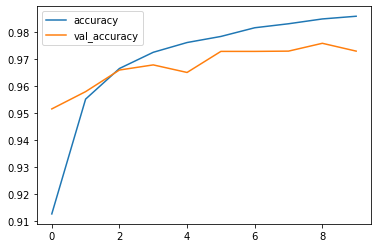

In [100]:
losses[['accuracy','val_accuracy']].plot()

<AxesSubplot:>

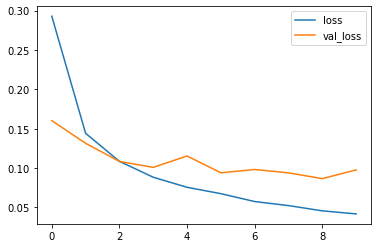

In [101]:
losses[['loss','val_loss']].plot()

In [102]:
print(model.metrics_names)
print(model.evaluate(x_test,y_cat_test,verbose=0))

['loss', 'accuracy']
[0.09767400473356247, 0.9728000164031982]


In [103]:
from sklearn.metrics import classification_report,confusion_matrix

In [104]:
predictions = model.predict_classes(x_test)

/home/irfan/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [105]:
y_cat_test.shape

(10000, 10)

In [106]:
y_cat_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [107]:
predictions[0]

7

In [108]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [109]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.97      1032
           3       0.94      0.98      0.96      1010
           4       0.98      0.97      0.97       982
           5       0.98      0.96      0.97       892
           6       0.98      0.98      0.98       958
           7       0.98      0.97      0.97      1028
           8       0.96      0.96      0.96       974
           9       0.97      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [110]:
confusion_matrix(y_test,predictions)

array([[ 965,    0,    3,    1,    2,    1,    3,    1,    4,    0],
       [   1, 1122,    3,    0,    0,    0,    2,    0,    7,    0],
       [   5,    2,  998,   10,    1,    1,    2,    6,    7,    0],
       [   1,    0,    0,  993,    1,    5,    0,    3,    4,    3],
       [   1,    1,    1,    0,  955,    0,    5,    3,    2,   14],
       [   2,    1,    0,   16,    4,  854,    4,    0,    9,    2],
       [   5,    2,    1,    1,    3,    4,  939,    0,    3,    0],
       [   0,    3,   10,    4,    1,    0,    0,  999,    3,    8],
       [   6,    2,    0,   13,    3,    4,    0,    3,  938,    5],
       [   2,    4,    0,   15,    9,    2,    0,    7,    5,  965]])

In [111]:
import seaborn as sns

<AxesSubplot:>

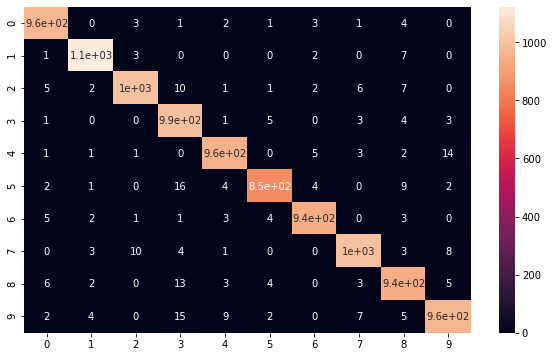

In [112]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)

# Predicting a given image

In [113]:
my_number = x_test[0]

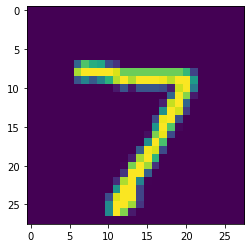

In [114]:
plt.imshow(my_number.reshape(28,28))

In [115]:
# SHAPE --> (num_images,width,height,color_channels)
model.predict_classes(my_number.reshape(1,28,28,1))

/home/irfan/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([7])

## Thus we have concluded the prediction on greyscale images. We can use this model to do prediction on greyscale images